In [1]:
import sys
sys.path.append('/users/stan/documents/')
import os
from glob import glob
import copy
import pandas
import numpy as np

from d_code.imaging.io import tifffile
import matplotlib.pylab as plt
from joblib import Parallel, delayed
from collections import defaultdict
from scipy import signal
from time import time
import cPickle as pickle
import spUtils
import seaborn as sns


import graphlab as gl
gl.canvas.set_target('ipynb')
import pandas as pd

sns.set_palette("husl")
sns.set_style("white")
sns.set_context("poster")


%matplotlib inline
#style notebook
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())


2016-05-12 17:47:43,208 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: /tmp/graphlab_server_1463089662.log


This non-commercial license of GraphLab Create is assigned to stanlp86@gmail.com and will expire on October 28, 2016. For commercial licensing options, visit https://dato.com/buy/.


In [2]:


qcGitDir = '/Users/Stan/Documents/myPiriform/notebooks/qc/sp041216a/'
sframePath = '/Users/Stan/Desktop/sp041216a/tracesDFfromTrial/sframe_processed'
rawTraces_e2_Path = '/Users/Stan/Desktop/sp041216a/e2_traces_dict.dat'
rawTraces_e3_Path = '/Users/Stan/Desktop/sp041216a/e3_traces_dict.dat'
workflowDict_e2_Path = '/Users/Stan/Desktop/sp041216a/workflow_dict_e2.dat'
workflowDict_e3_Path = '/Users/Stan/Desktop/sp041216a/workflow_dict_e3.dat'
odorInfoPath = '/Users/Stan/Desktop/sp041216a/odorInfo.dat'

In [3]:
experiment = 'sp041216a'

In [4]:
workflow_dict = pickle.load(open(workflowDict_e2_Path))

In [5]:
odor = 2

In [6]:
workflow_dict.keys()

['odor_info',
 'numOdors',
 'normed_traces',
 'numTrials',
 'numCells',
 'raw_traces',
 'events']

In [7]:
numOdors=workflow_dict['numOdors']
numTrials=workflow_dict['numTrials']
numCells=workflow_dict['numCells']

In [8]:
normed_traces = workflow_dict['normed_traces']['corrected_rois']

In [9]:
odor_info = spUtils.gen_dict_extract('odor_info', workflow_dict).next()

odor_on_times_by_trial = defaultdict(list)
for odor in range(1,numOdors+1):
    for trial in range(numTrials):
        odor_on_times_by_trial[odor].append(odor_info[trial]['on'][odor])
        
odor_off_times_by_trial = defaultdict(list)
for odor in range(1,numOdors+1):
    for trial in range(numTrials):
        odor_off_times_by_trial[odor].append(odor_info[trial]['off'][odor])
        
odor_interval_by_trial = defaultdict(list)
for odor in range(1,numOdors+1):
    for trial in range(numTrials):
        odor_interval_by_trial[odor].append(odor_info[trial]['pre_odor_post_interval'][odor])

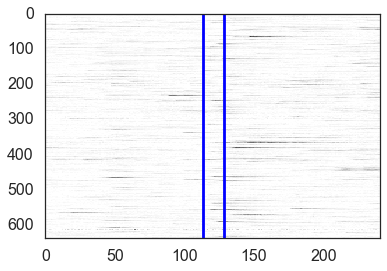

In [10]:
for trial in range(numTrials):
    plt.figure()
    sta, sto  = odor_interval_by_trial[odor][trial]
    slice_  = slice(sta,sto,1)
    plt.imshow(normed_traces[slice_,:,trial].T, aspect = 'auto')
    plt.axvline(113)
    plt.axvline(128)
    plt.clim(0,3)
    break

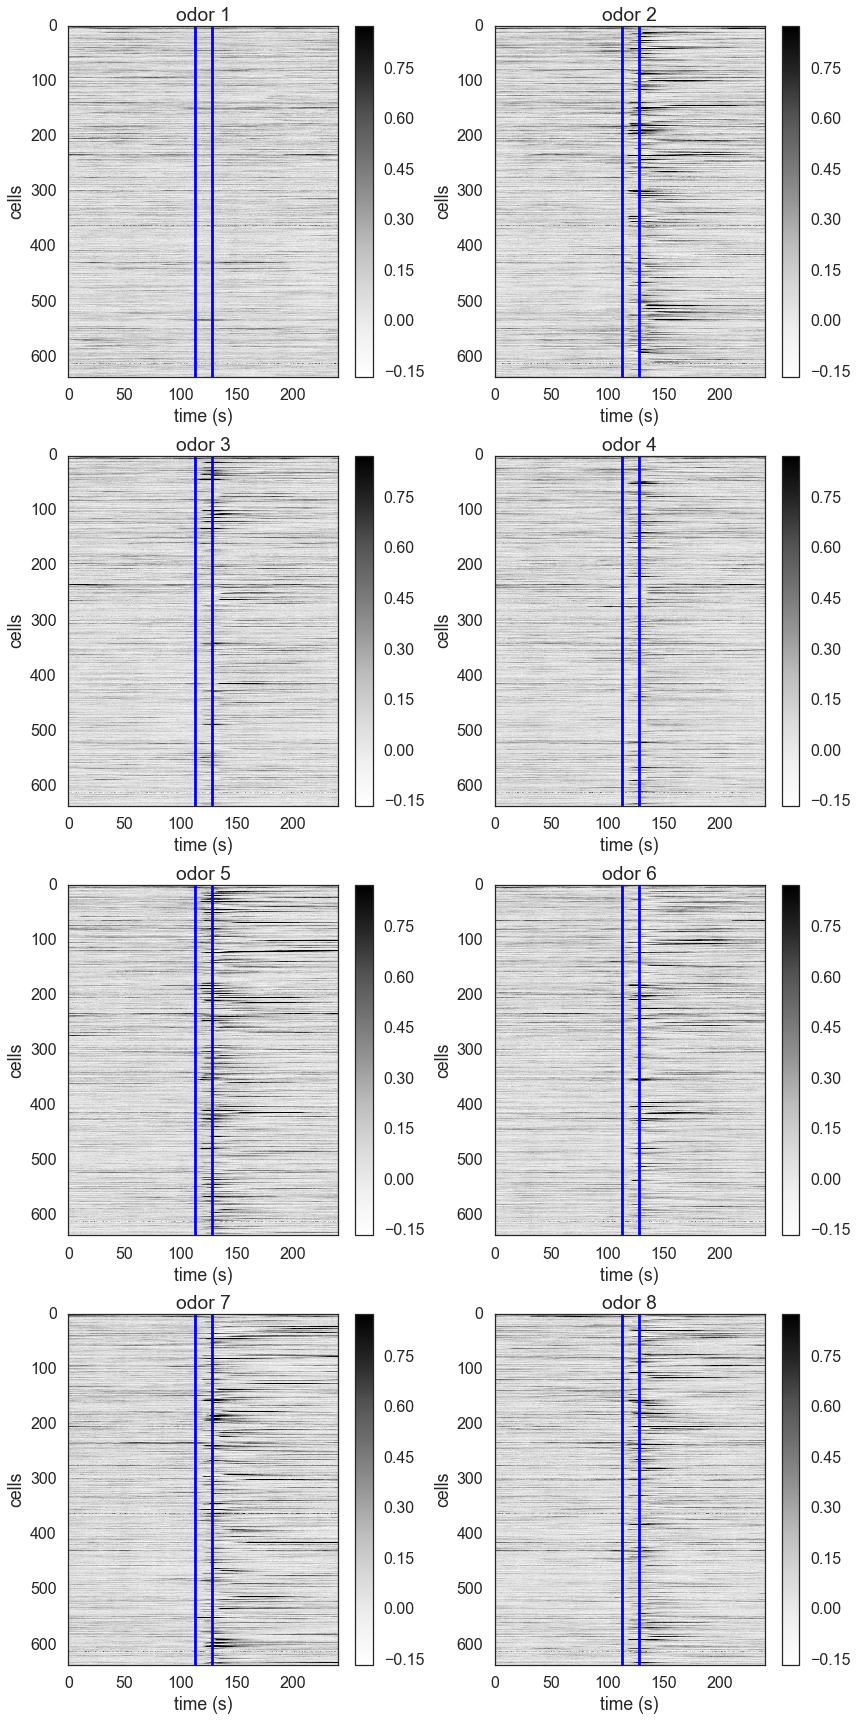

In [11]:
from scipy.stats.mstats import mquantiles
min_, max_ = mquantiles(normed_traces[...,:].flatten(),  prob=[0.02, .98])
idxs = np.vstack(odor_interval_by_trial[odor])
offset = 113
nro=numOdors/2
nco=2
plt.subplots(nro,nco, sharex=True, sharey=True, figsize = (3*nro,12*nco))
for idx, odor in enumerate(range(1,numOdors+1)):
    aa = []
    title = 'odor {}'.format(odor)#odor_info[0]['odor_names'][idx][1]
    for trial in range(numTrials):
        sta, sto  = odor_interval_by_trial[odor][trial]
        test  = slice(sta,sto,1)
        
        aa.append(normed_traces[test,:,trial])
    aa = np.dstack(aa)
    plt.subplot(nro,nco,idx+1)
    plt.title(title)
    plot = plt.imshow(aa.mean(2).T, aspect = 'auto', vmin = min_,vmax = max_)
    plt.ylabel('cells')
    plt.xlabel('time (s)')
    plt.colorbar()
    #plt.clim(0,2)
    plt.axvline(offset)
    plt.axvline(offset+15)
plt.tight_layout()


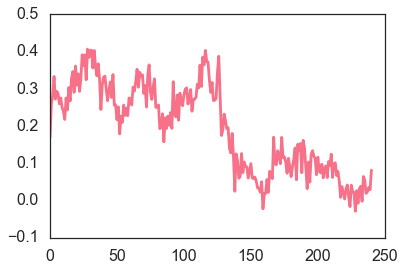

In [60]:
plt.plot(odor8[...,1])

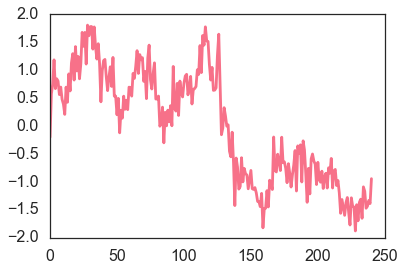

In [70]:
plt.plot(scale(odor8[...,1:2]))

In [63]:
odor8[...,1:2].shape

(241, 1)

In [68]:
odor8[...,1:2].T.shape

(1, 241)

In [153]:
scale(odor8[:,1:2]).T.shape

(1, 241)

In [ ]:
scale(odor8).T

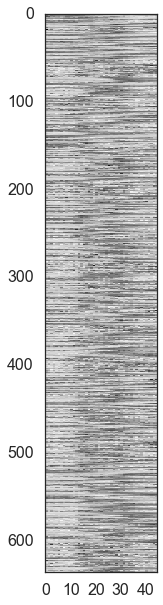

In [967]:
cell = 100
XScaled = scale(odor8[105:150,:],0)
plt.figure(figsize=(2,10))
plt.imshow(XScaled.T,aspect = 'auto')




0.978732539944


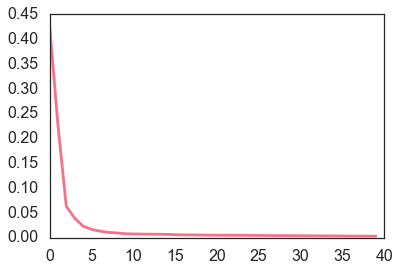

In [1504]:
import numpy as np
from sklearn.decomposition import PCA
components = 40
X = scale(odor8[100:150,:],0)

pca = PCA(n_components=components)
Y = pca.fit(X.T).components_

#PCA(copy=True, n_components=components, whiten=False)
plt.plot(pca.explained_variance_ratio_) 
print sum(pca.explained_variance_ratio_)
Y=scale(Y,1)

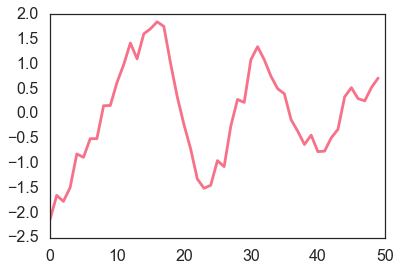

In [1530]:
plt.plot(Y[4])

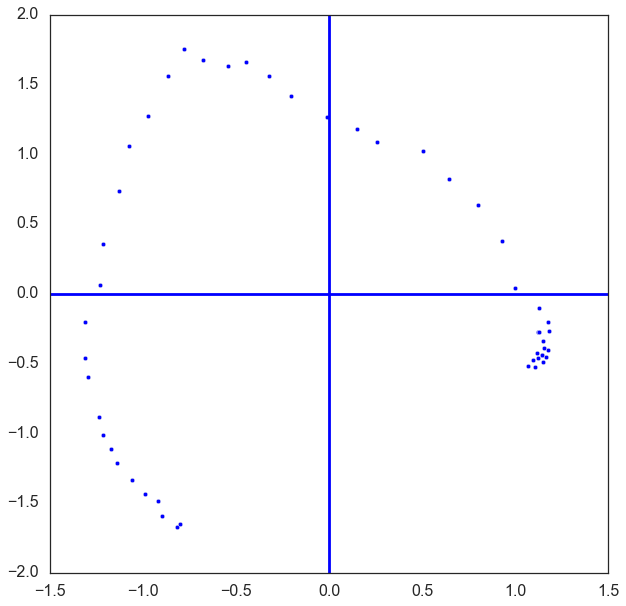

In [1505]:
plt.figure(figsize = (10,10))
plt.scatter(Y[0,:], Y[1,:])
plt.axhline(0)
plt.axvline(0)

In [1508]:
Y.shape

(40, 50)

In [1514]:
#cluster. 
from sklearn.cluster import KMeans
clusters = 4
kmeans_model = KMeans(n_clusters=clusters,init='k-means++', n_init = 100, random_state=1, n_jobs=1).fit(X[:,...])
#kmeans_model = KMeans(n_clusters=clusters,init='k-means++', n_init = 100, random_state=1, n_jobs=1).fit(Y.T)


ZeroDivisionError: integer division or modulo by zero

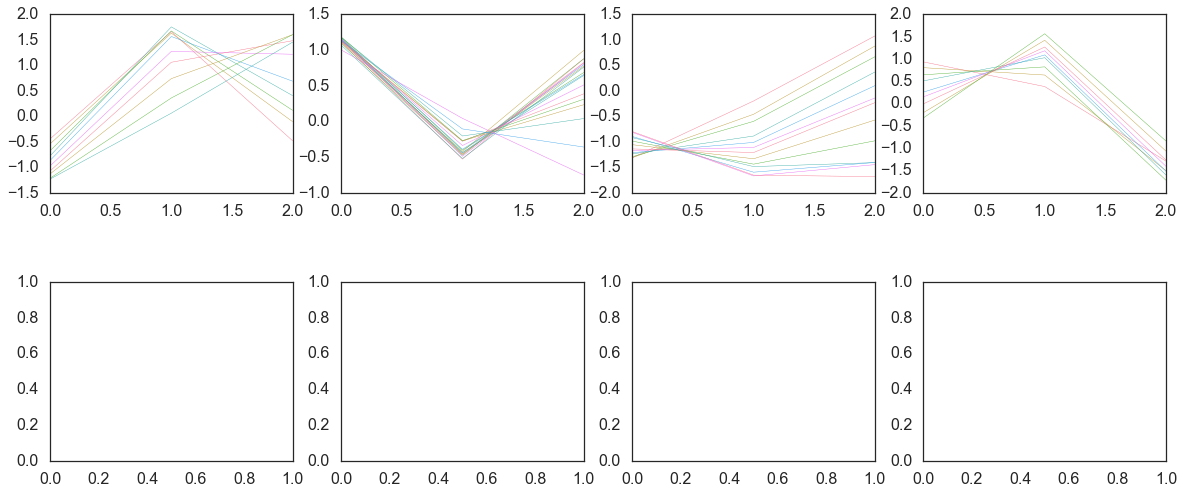

In [1515]:
fig, ax = plt.subplots(2,4,figsize = (20,8))
ax = ax.ravel()
for i,axes in enumerate(ax):
    axes.plot(Y[:3,kmeans_model.labels_==i], linewidth = 0.4)
    #axes.set_ylim((-0.2,.2))
plt.tight_layout()

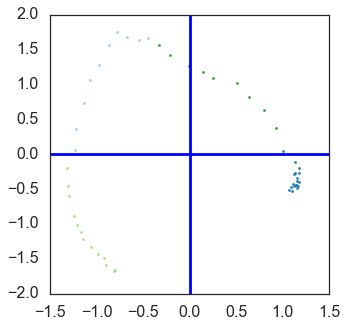

In [1517]:
plt.figure(figsize = (5,5))
_cmap = sns.color_palette('Paired',clusters)
for i in range(clusters):
#     if i not in [2,4,5]:
#         continue
    _color = _cmap[i]
    plt.scatter(Y[0,kmeans_model.labels_==i], Y[1,kmeans_model.labels_==i], color = _color, s = 5)
    
plt.axhline(0)
plt.axvline(0)
# plt.xlim(-2,2)
# plt.ylim(-2,2)

/Users/Stan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 636 but corresponding boolean dimension is 50


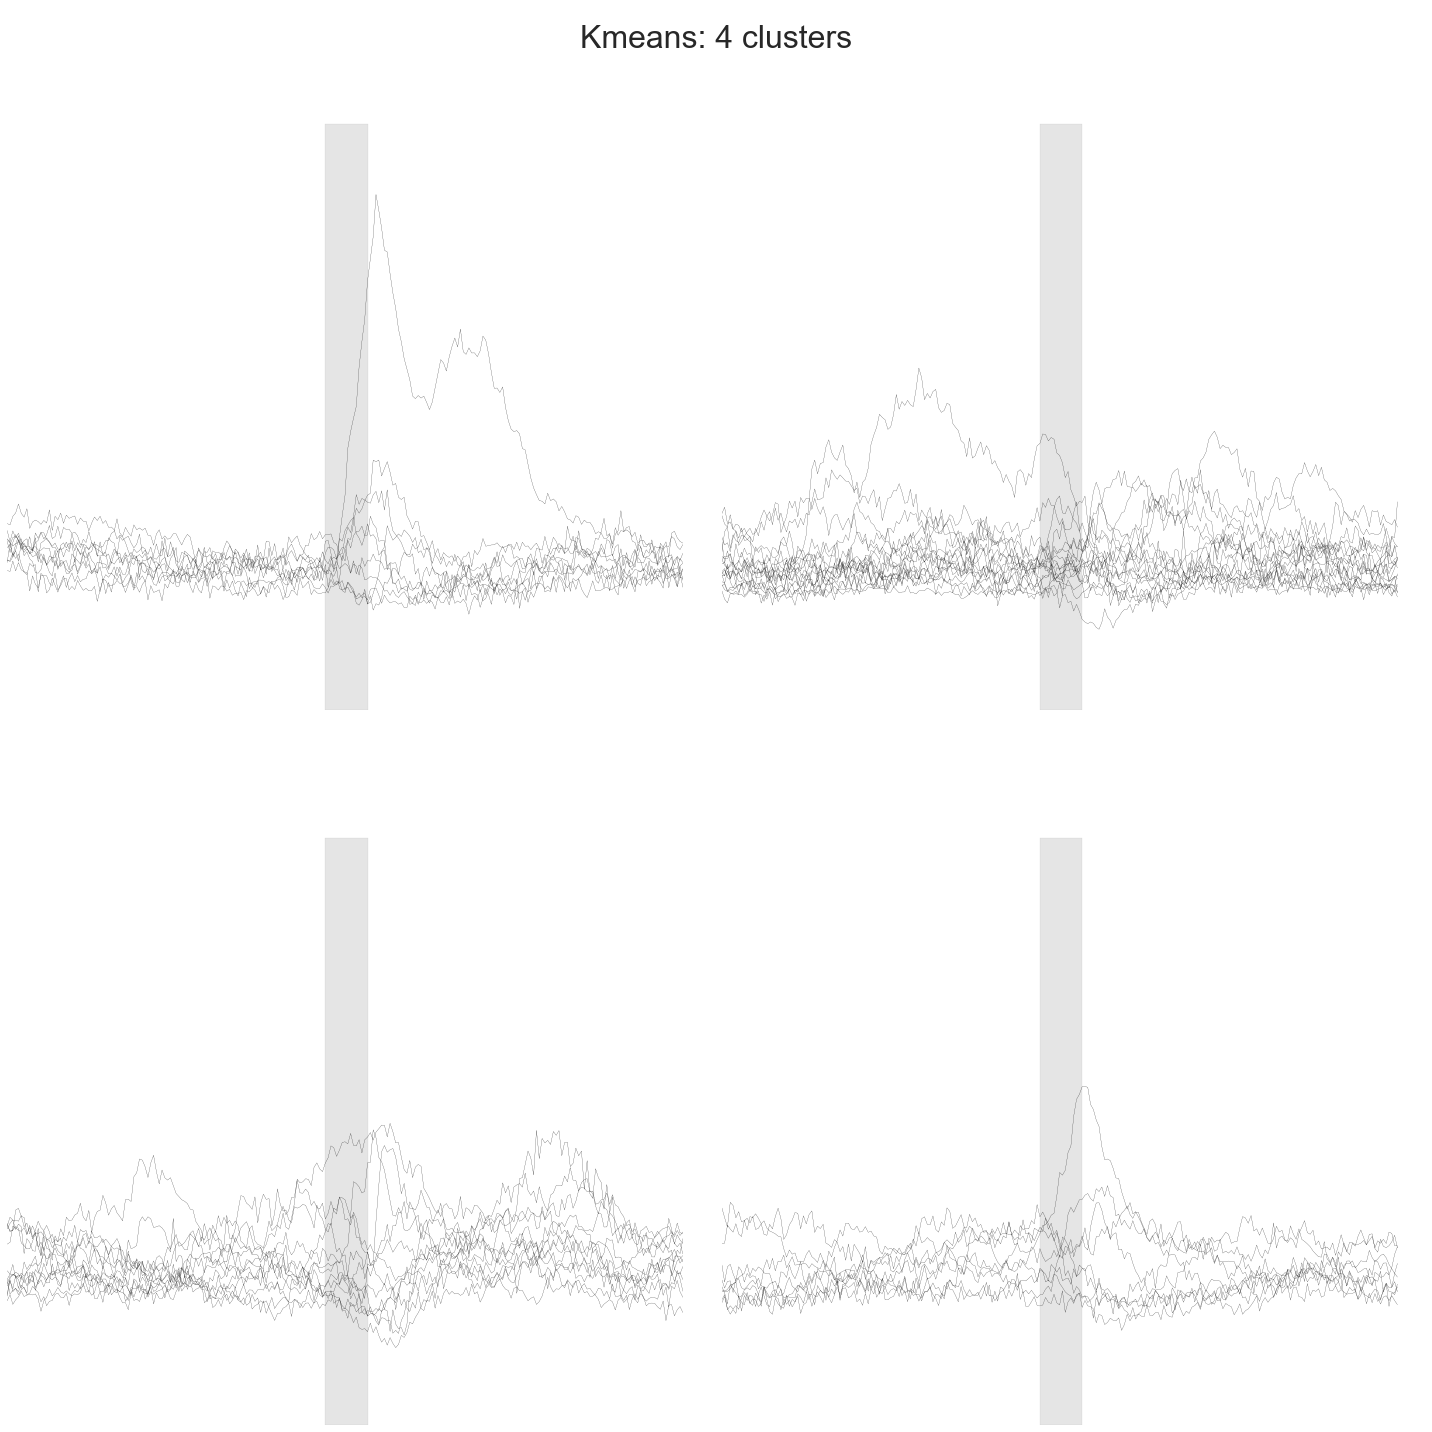

In [1531]:
fig, ax = plt.subplots(2,2,figsize = (20,20))
ax = ax.ravel()
fig.suptitle('Kmeans: {0} clusters'.format(clusters), fontsize = 32)
for i, axes in enumerate(ax):   
    axes.plot(odor8[:,kmeans_model.labels_==i], linewidth = .2, color = 'k')
    axes.add_patch(plt.Rectangle((113,-.5),15,2.5,alpha = 0.2, color = 'grey'))
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.spines['left'].set_visible(False)
    axes.set_ylim(-.5,2.5)
    #axes.set_title()
plt.tight_layout()
#plt.savefig('/users/stan/desktop/clusters{0}.png'.format(clusters), dpi = 300)


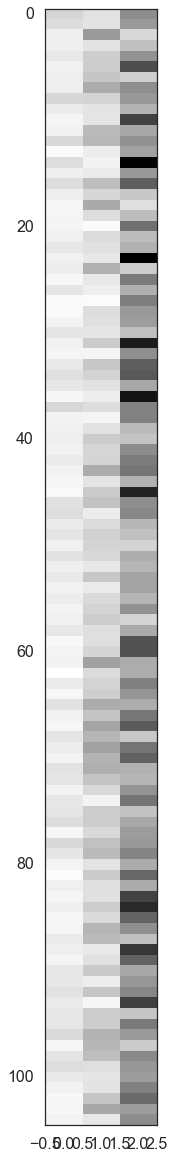

In [119]:
plt.subplots(figsize = (2,20))
plt.imshow(v[:,fit.labels_==0].T, aspect = 'auto')


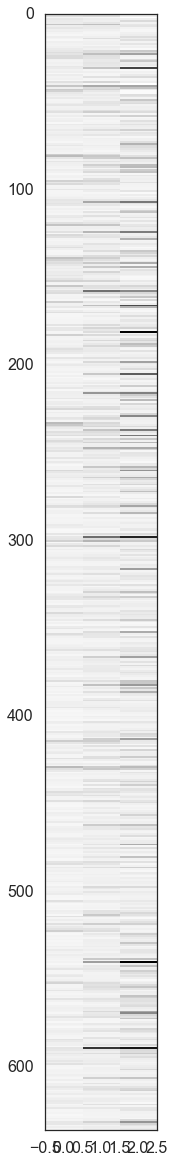

In [50]:
plt.subplots(figsize = (2,20))
plt.imshow(np.vstack((a,b,c)).T, aspect = 'auto')

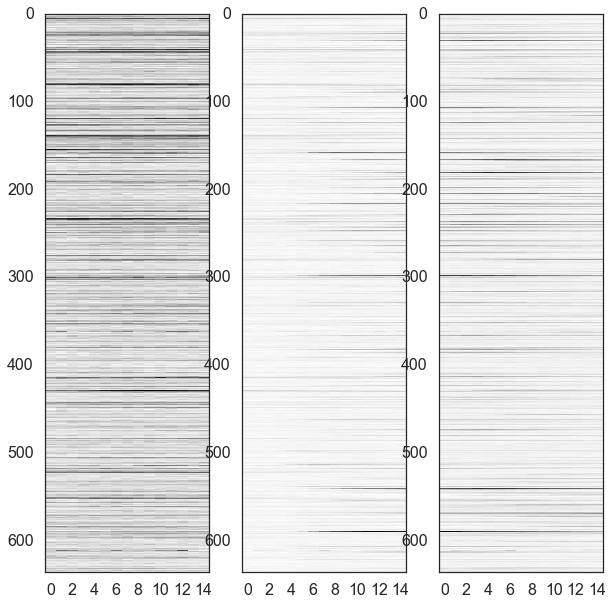

In [47]:
plt.subplots(1,3, figsize = (10,10))
plt.subplot(1,3,1)
plt.imshow(odor8[98:113].T, aspect = 'auto')
plt.subplot(1,3,2)
plt.imshow(odor8[113:128].T, aspect = 'auto')
plt.subplot(1,3,3)
plt.imshow(odor8[128:143].T, aspect = 'auto')
